In [2]:
import tensorflow as tf

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 2-1创建图

In [3]:
#创建一个向量op
m1 = tf.constant([[3,3]])
#创建一个向量op
m2 = tf.constant([[2],[3]])
#创建一个矩阵乘法op,把m1和m2传入
product = tf.matmul(m1,m2)
print(product)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


In [4]:
#定义一个会话，启动默认图
sess = tf.Session()
#调用sess的run方法来执行矩阵乘法op
#run(product)触发图中3个op
result = sess.run(product)
print(result)
sess.close()

[[15]]


In [5]:
with tf.Session() as sess:
    #调用sess的run方法来执行矩阵乘法op
    #run(product)触发图中3个op
    result = sess.run(product)
    print(result)

[[15]]


### 2-2变量

In [6]:
x = tf.Variable([1,2])
a = tf.constant([3,3])
sub = tf.subtract(x,a)
add = tf.add(x,a)

#变量初始化操作
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))

[-2 -1]
[4 5]


In [7]:
#创建一个变量初始化为0
state = tf.Variable(0,name="counter")

#创建一个op,作用是使state加1
new_value = tf.add(state,1)
update = tf.assign(state,new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))
    

0
1
2
3
4
5


### 2-3 Fetch and Feed

In [8]:
#Fetch
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)

add = tf.add(input2,input3)
mul = tf.multiply(input1,add)

with tf.Session() as sess:
    result = sess.run([mul,add])
    print(result)

[21.0, 7.0]


In [9]:
#Feed
input4 = tf.placeholder(tf.float32)
input5 = tf.placeholder(tf.float32)
out = tf.multiply(input4,input5)

with tf.Session() as sess:
    print(sess.run(out,feed_dict={input4:[7.0],input5:[2.]}))


[14.]


### 2-4 简单示例

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

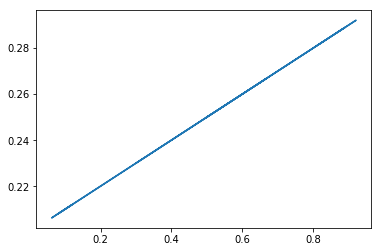

In [12]:
#使用numpy生成10个随机点
x_data = np.random.rand(10)
y_data = x_data * 0.1 + 0.2 

import matplotlib.pyplot as plt
plt.plot(x_data,y_data)

In [13]:
#构建一个线性模型
b = tf.Variable(10.0)
k = tf.Variable(0.)
x = tf.placeholder(tf.float32,shape=(10,))
real_y = tf.placeholder(tf.float32,shape=(10,))
pred_y = k * x + b 

#二次代价函数
loss = tf.reduce_mean(tf.square(real_y-pred_y))

#定义一个梯度下降法来进行训练的优化器
optimizer = tf.train.GradientDescentOptimizer(0.2)
#最小化代价函数
train_op = optimizer.minimize(loss)

#初始化变量
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train_op,feed_dict={x:x_data,real_y:y_data})
        if(step % 20 == 0):
            print(sess.run([k,b]))
    print("final:",sess.run([k,b]))

[-1.9431031, 6.0999713]
[-1.9964045, 1.3390149]
[-0.98451895, 0.7892373]
[-0.4610466, 0.504826]
[-0.19024232, 0.35769352]
[-0.05014902, 0.28157848]
[0.02232447, 0.24220242]
[0.05981667, 0.22183228]
[0.07921224, 0.21129434]
[0.08924601, 0.20584282]
[0.09443672, 0.20302263]
final: [0.09443672, 0.20302263]


### 3-1 线性回归

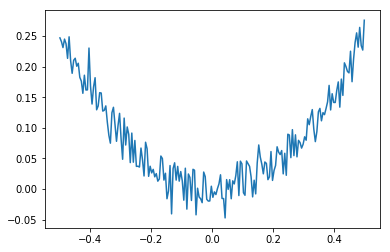

In [14]:
#使用numpy生成1000个随机点
x_data1 = np.linspace(-0.5,0.5,200)[:np.newaxis]
noise = np.random.normal(0,0.02,x_data1.shape)
y_data1 = np.square(x_data1) + noise

plt.plot(x_data1,y_data1)

0.40884987
0.003034777
0.0014639577
0.0008620977
0.0006462585
0.0005713143
0.000543901
0.0005318613
0.0005248524
0.0005196649


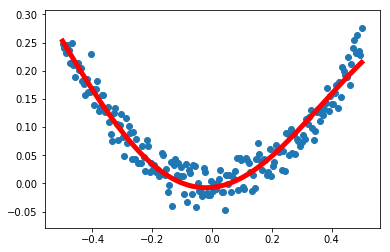

In [15]:
#定义两个placeholder
x_31 = tf.placeholder(tf.float32,shape=[None,1])
y_31 = tf.placeholder(tf.float32,shape=[None,1])

#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random.normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x_31,Weights_L1) + biases_L1
#激活函数
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义神经网络输出层
Weights_L2 = tf.Variable(tf.random.normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.reduce_mean(tf.square(y_31-prediction))
#使用梯度下降训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

#初始化变量
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(2000):
        _,loss_value = sess.run([train_step,loss],feed_dict={x_31:x_data1.reshape(-1,1),y_31:y_data1.reshape(-1,1)})
        if step%200 == 0:
            print(loss_value)
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict={x_31:x_data1.reshape(-1,1)})
    
    #画图
    plt.figure()
    plt.scatter(x_data1,y_data1)
    plt.plot(x_data1,prediction_value,'r-',lw=5)
    plt.show()

In [16]:
x_data1.reshape(-1,1).shape

(200, 1)

### 3-3 MNIST demo

In [17]:
from tensorflow.examples.tutorials.mnist import input_data

In [18]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

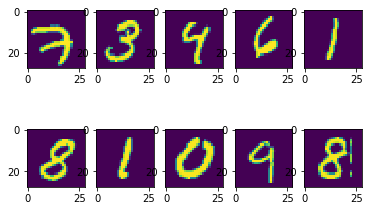

In [37]:
plt.figure
for i in range(10):
    plt.subplot(2,5,(i+1))
    plt.imshow(mnist.train.images[i].reshape(28,28))

In [53]:
batch_size = 100

n_batch = mnist.train.num_examples // batch_size

#定义2个placeholder
mnist_x = tf.placeholder(tf.float32,[None,784])
mnist_y = tf.placeholder(tf.float32,[None,10])

#c创建一个简单神经网络
v = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
mnist_prediction = tf.nn.softmax(tf.matmul(mnist_x,v)+b)

#二次代价函数
loss = tf.reduce_mean(tf.square(mnist_y-mnist_prediction))
#使用梯度下降法
mnist_train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

#初始化变量
init = tf.global_variables_initializer()

#所在位置比较
mnist_correct_prediction = tf.equal(tf.argmax(mnist_y,1),tf.argmax(mnist_prediction,1))
#求准确率
accuracy = tf.reduce_mean(tf.cast(mnist_correct_prediction,tf.float32)) #tf.cast布尔值转换为浮点型

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) #获取下一个100
            sess.run(mnist_train_step,feed_dict={mnist_x:batch_xs,mnist_y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={mnist_x:mnist.validation.images,mnist_y:mnist.validation.labels})
        print("Iter",epoch,",valid Accuracy:",acc)

Iter 0 ,valid Accuracy: 0.8286
Iter 1 ,valid Accuracy: 0.8662
Iter 2 ,valid Accuracy: 0.8786
Iter 3 ,valid Accuracy: 0.8874
Iter 4 ,valid Accuracy: 0.8922
Iter 5 ,valid Accuracy: 0.896
Iter 6 ,valid Accuracy: 0.8996
Iter 7 ,valid Accuracy: 0.9006
Iter 8 ,valid Accuracy: 0.9022
Iter 9 ,valid Accuracy: 0.905
Iter 10 ,valid Accuracy: 0.9068
Iter 11 ,valid Accuracy: 0.9078
Iter 12 ,valid Accuracy: 0.9084
Iter 13 ,valid Accuracy: 0.9098
Iter 14 ,valid Accuracy: 0.9106
Iter 15 ,valid Accuracy: 0.912
Iter 16 ,valid Accuracy: 0.9132
Iter 17 ,valid Accuracy: 0.9138
Iter 18 ,valid Accuracy: 0.914
Iter 19 ,valid Accuracy: 0.9142
Iter 20 ,valid Accuracy: 0.9158


In [56]:
#f.nn.sigmoid_cross_entropy_with_logits()来表示跟sigmiod搭配使用的交叉熵
#f.nn.softmax_cross_entropy_with_logits()来表示跟softmax来搭配使用的交叉熵

### 4-1 平方损失和交叉熵损失区别

C表示代价函数，x表示样本，y表示实际值，a表示输出值，n表示样本总数
$a=σ(z),z=\sum{W_j*x_j}+b$,sigmoid的导数为$σ^`(z) = σ(z)(1-σ(z))$

1.损失函数为平方损失计算梯度函数为:

$C=\frac{(y-a)^2}{2}$

1.1.$ δ(C)/δ(ω) = \frac{1}{n}\sum{x}(σ(z) - y) σ^`(z)$

1.2.$ δ(C)/δ(b) = \frac{1}{n}\sum(σ(z) - y) σ^`(z)$

其中梯度和激活函数的导数成正比，激活函数导数越大调整越快，如果激活函数为sigmoid函数则在2头位置收敛会变得很慢，一般优化的方式是将初始化方式变为正太分布方式，或是不使用sigmoid激活函数改为使用relu的方式

2.损失函数为交叉熵损失计算梯度函数为:

$C=-\frac{1}{n}\sum{y\ln{a} + (1-y)\ln(1-a)}$

1.1.$ δ(C)/δ(ω) = \frac{1}{n}\sum{x(σ(z) - y)} $

1.2.$ δ(C)/δ(b) = \frac{1}{n}\sum{(σ(z) - y)}$

调整与$σ^`(z)$无关,梯度公式中$σ(z) - y$表示的误差值，当误差越大梯度就越大，训练就越快

sigmoid的导数为$σ^`(z) = σ(z)(1-σ(z))$

In [55]:
#交叉熵对比


#c创建一个简单神经网络
v2 = tf.Variable(tf.zeros([784,10]))
b2 = tf.Variable(tf.zeros([10]))
mnist_prediction2 = tf.nn.softmax(tf.matmul(mnist_x,v2)+b2)

#交叉熵
loss2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=mnist_y,logits=mnist_prediction2))
#使用梯度下降法
mnist_train_step2 = tf.train.GradientDescentOptimizer(0.2).minimize(loss2)

#初始化变量
init2 = tf.global_variables_initializer()

#所在位置比较
mnist_correct_prediction2 = tf.equal(tf.argmax(mnist_y,1),tf.argmax(mnist_prediction2,1))
#求准确率
accuracy2 = tf.reduce_mean(tf.cast(mnist_correct_prediction2,tf.float32)) #tf.cast布尔值转换为浮点型

with tf.Session() as sess:
    sess.run(init2)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) #获取下一个100
            sess.run(mnist_train_step2,feed_dict={mnist_x:batch_xs,mnist_y:batch_ys})
        
        acc2 = sess.run(accuracy2,feed_dict={mnist_x:mnist.validation.images,mnist_y:mnist.validation.labels})
        print("Iter",epoch,",valid Accuracy:",acc2)

Iter 0 ,valid Accuracy: 0.8252
Iter 1 ,valid Accuracy: 0.8932
Iter 2 ,valid Accuracy: 0.9028
Iter 3 ,valid Accuracy: 0.9066
Iter 4 ,valid Accuracy: 0.909
Iter 5 ,valid Accuracy: 0.91
Iter 6 ,valid Accuracy: 0.9136
Iter 7 ,valid Accuracy: 0.9144
Iter 8 ,valid Accuracy: 0.9174
Iter 9 ,valid Accuracy: 0.9168
Iter 10 ,valid Accuracy: 0.9178
Iter 11 ,valid Accuracy: 0.9186
Iter 12 ,valid Accuracy: 0.919
Iter 13 ,valid Accuracy: 0.9192
Iter 14 ,valid Accuracy: 0.9194
Iter 15 ,valid Accuracy: 0.9202
Iter 16 ,valid Accuracy: 0.9212
Iter 17 ,valid Accuracy: 0.9218
Iter 18 ,valid Accuracy: 0.9222
Iter 19 ,valid Accuracy: 0.9232
Iter 20 ,valid Accuracy: 0.9226


### 4-2 过拟合和欠拟合
<img src='./过欠拟合.png'><br>
解决方法:<br>
1.增加数据集<br>
2.正则化方法<br>
3.Dropout

In [62]:
#增加dropout

#交叉熵对比


keep_prob = tf.placeholder(tf.float32)
#c创建一个简单神经网络
v3_1 = tf.Variable(tf.truncated_normal([784,2000],stddev=0.1))
b3_1 = tf.Variable(tf.zeros([2000])+0.1)
l3_1 = tf.nn.tanh(tf.matmul(mnist_x,v3_1)+b3_1)
l3_1_drop = tf.nn.dropout(l3_1,keep_prob=keep_prob)

v3_2 = tf.Variable(tf.truncated_normal([2000,2000],stddev=0.1))
b3_2 = tf.Variable(tf.zeros([2000])+0.1)
l3_2 = tf.nn.tanh(tf.matmul(l3_1_drop,v3_2)+b3_2)
l3_2_drop = tf.nn.dropout(l3_2,keep_prob=keep_prob)

v3_3 = tf.Variable(tf.truncated_normal([2000,1000],stddev=0.1))
b3_3 = tf.Variable(tf.zeros([1000])+0.1)
l3_3 = tf.nn.tanh(tf.matmul(l3_2_drop,v3_3)+b3_3)
l3_3_drop = tf.nn.dropout(l3_3,keep_prob=keep_prob)

v3_4 = tf.Variable(tf.truncated_normal([1000,10],stddev=0.1))
b3_4 = tf.Variable(tf.zeros([10])+0.1)
mnist_prediction3 = tf.nn.softmax(tf.matmul(l3_3_drop,v3_4)+b3_4)

#交叉熵
loss3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=mnist_y,logits=mnist_prediction3))
#使用梯度下降法
mnist_train_step3 = tf.train.GradientDescentOptimizer(0.2).minimize(loss3)

#初始化变量
init3 = tf.global_variables_initializer()

#所在位置比较
mnist_correct_prediction3 = tf.equal(tf.argmax(mnist_y,1),tf.argmax(mnist_prediction3,1))
#求准确率
accuracy3 = tf.reduce_mean(tf.cast(mnist_correct_prediction3,tf.float32)) #tf.cast布尔值转换为浮点型

with tf.Session() as sess:
    sess.run(init3)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) #获取下一个100
            sess.run(mnist_train_step3,feed_dict={mnist_x:batch_xs,mnist_y:batch_ys,keep_prob:1.0})
        
        valid_acc3 = sess.run(accuracy3,feed_dict={mnist_x:mnist.validation.images,mnist_y:mnist.validation.labels,keep_prob:1.0})
        train_acc3 = sess.run(accuracy3,feed_dict={mnist_x:mnist.train.images,mnist_y:mnist.train.labels,keep_prob:1.0})

        print("Iter",epoch,",valid Accuracy:",valid_acc3,",train Accuracy：",train_acc3)

Iter 0 ,valid Accuracy: 0.9548 ,train Accuracy： 0.9588364
Iter 1 ,valid Accuracy: 0.9604 ,train Accuracy： 0.9739818
Iter 2 ,valid Accuracy: 0.9622 ,train Accuracy： 0.9803636
Iter 3 ,valid Accuracy: 0.9692 ,train Accuracy： 0.9859273
Iter 4 ,valid Accuracy: 0.9696 ,train Accuracy： 0.98832726
Iter 5 ,valid Accuracy: 0.9704 ,train Accuracy： 0.98981816
Iter 6 ,valid Accuracy: 0.9732 ,train Accuracy： 0.9906727
Iter 7 ,valid Accuracy: 0.9732 ,train Accuracy： 0.9914182
Iter 8 ,valid Accuracy: 0.9738 ,train Accuracy： 0.99194545
Iter 9 ,valid Accuracy: 0.9736 ,train Accuracy： 0.99241817


KeyboardInterrupt: 